In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kruskal
from scipy.stats import ttest_ind

In [26]:
# Load the dataset
df = pd.read_csv('data/data.csv')

In [71]:
# Separate data for Moscow and Moscow Oblast
moscow_data = df[df['Region'] == 'Moscow'].replace([np.inf], np.nan)
moscow_oblast_data = df[df['Region'] != 'Moscow'].replace([np.inf], np.nan)

#### 

C:\Users\Mebarek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


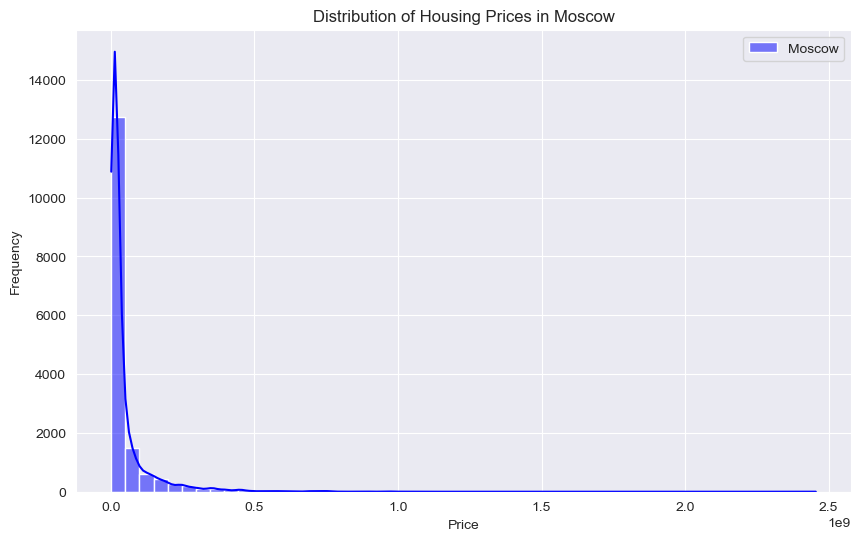

In [37]:
# Plot distribution of housing prices for Moscow
plt.figure(figsize=(10, 6))
sns.histplot(moscow_data['Price'], bins=50, kde=True, color='blue', label='Moscow')
plt.title('Distribution of Housing Prices in Moscow')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [35]:
# Calculate summary statistics
moscow_stats = moscow_data['Price'].describe()
print("Summary Statistics for Housing Prices in Moscow:")
print(moscow_stats)

Summary Statistics for Housing Prices in Moscow:
count    1.611300e+04
mean     4.798348e+07
std      9.573436e+07
min      1.150000e+06
25%      1.020000e+07
50%      1.595000e+07
75%      4.000000e+07
max      2.455020e+09
Name: Price, dtype: float64


In [72]:
# Calculate summary statistics
moscow_oblast_data = moscow_oblast_data['Price'].describe()
print("Summary Statistics for Housing Prices in Moscow Oblast:")
print(moscow_oblast_data)

Summary Statistics for Housing Prices in Moscow Oblast:
count    6.563000e+03
mean     6.998220e+06
std      2.789919e+06
min      1.939125e+06
25%      5.304380e+06
50%      6.546779e+06
75%      8.076780e+06
max      5.300000e+07
Name: Price, dtype: float64


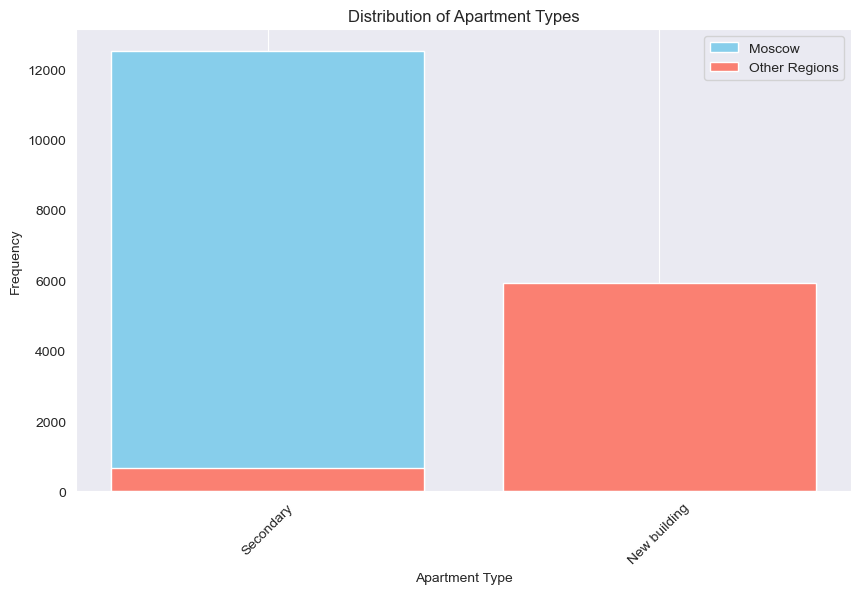

In [38]:
# Count apartment types in each subset
moscow_apartment_types = moscow_data['Apartment type'].value_counts()
other_regions_apartment_types = other_regions_data['Apartment type'].value_counts()

# Visualize distribution of apartment types
plt.figure(figsize=(10, 6))
plt.bar(moscow_apartment_types.index, moscow_apartment_types.values, color='skyblue', label='Moscow')
plt.bar(other_regions_apartment_types.index, other_regions_apartment_types.values, color='salmon', label='Other Regions')
plt.title('Distribution of Apartment Types')
plt.xlabel('Apartment Type')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [77]:
moscow_oblast_price = df[df['Price'] != 'Moscow']

C:\Users\Mebarek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


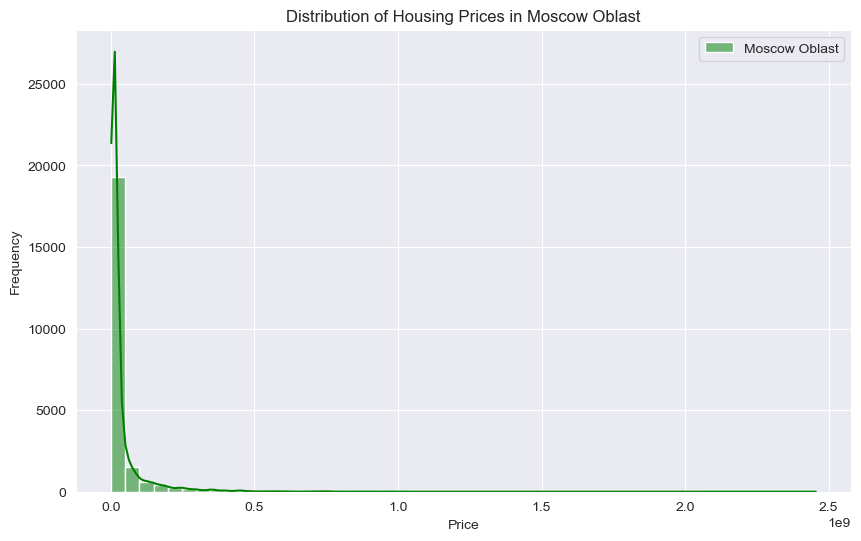

In [79]:
# Plot distribution of housing prices for Moscow Oblast
plt.figure(figsize=(10, 6))
sns.histplot(moscow_oblast_price['Price'], bins=50, kde=True, color='green', label='Moscow Oblast')
plt.title('Distribution of Housing Prices in Moscow Oblast')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [41]:
# Calculate correlation coefficients
correlation_matrix = df[['Price', 'Area', 'Living area', 'Kitchen area']].corr()

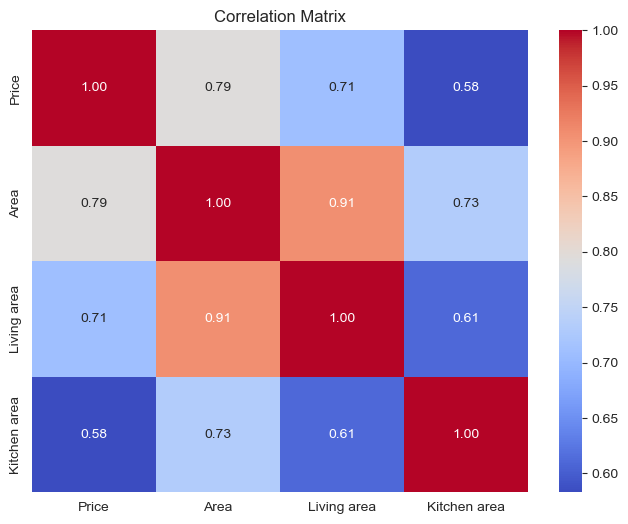

In [43]:
# Visualize correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

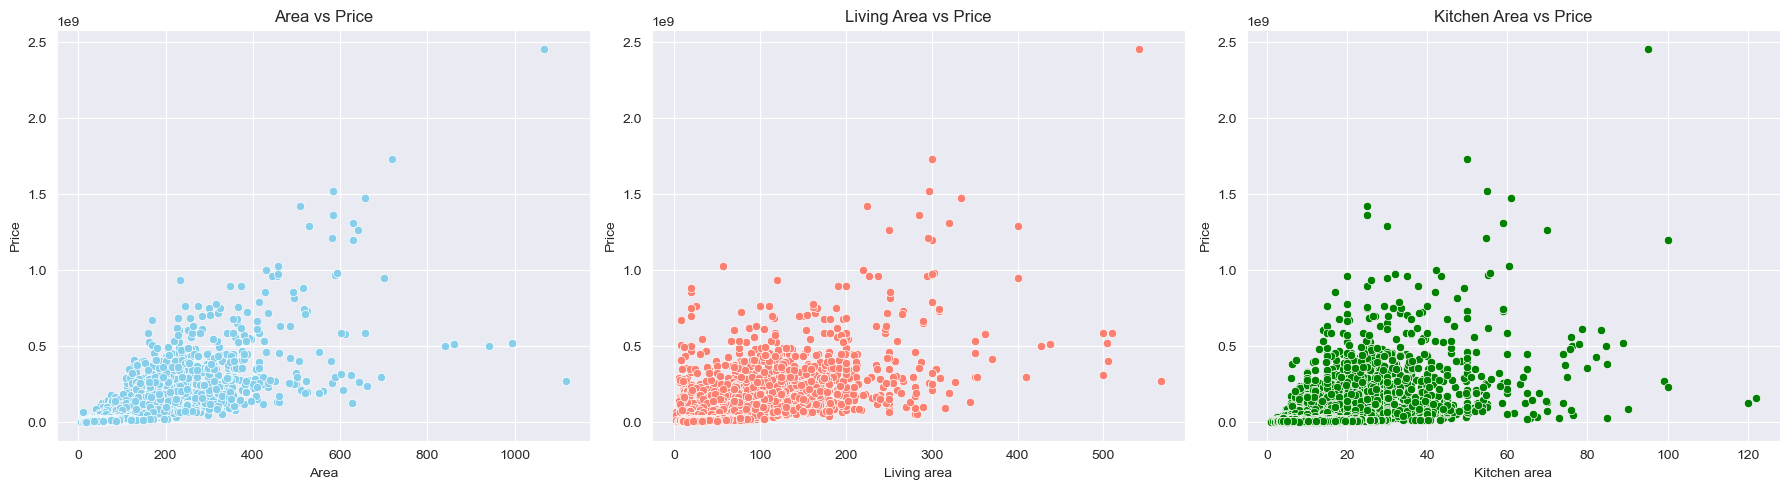

In [44]:
# Visualize relationships using scatter plots
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Area', y='Price', color='skyblue')
plt.title('Area vs Price')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Living area', y='Price', color='salmon')
plt.title('Living Area vs Price')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Kitchen area', y='Price', color='green')
plt.title('Kitchen Area vs Price')

plt.tight_layout()
plt.show()

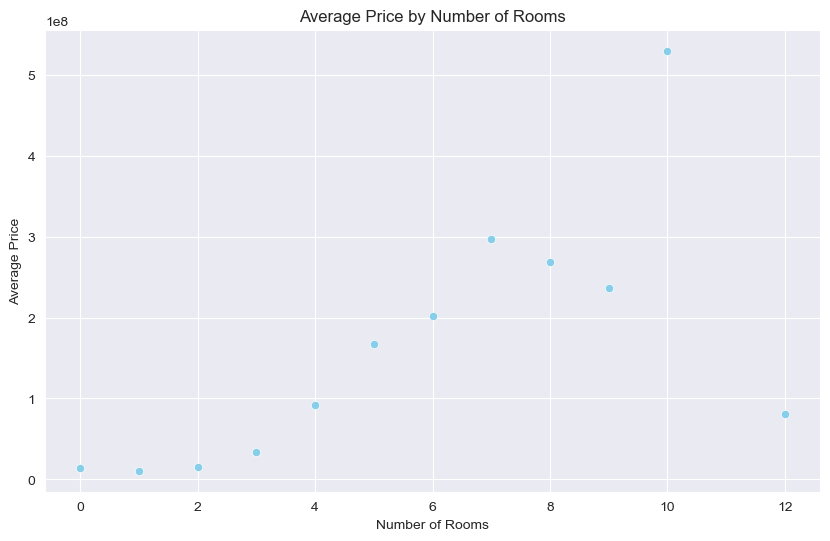

In [45]:
# Group data by number of rooms and calculate mean price for each group
room_price_mean = df.groupby('Number of rooms')['Price'].mean().reset_index()

# Visualize relationship using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=room_price_mean, x='Number of rooms', y='Price', color='skyblue')
plt.title('Average Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

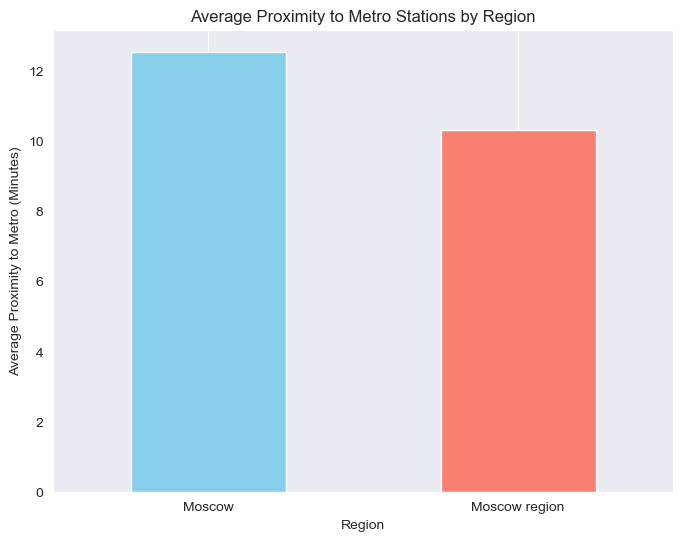

In [46]:
# Group data by region and calculate mean proximity to metro
mean_proximity_by_region = df.groupby('Region')['Minutes to metro'].mean()

# Visualize results using a bar plot
plt.figure(figsize=(8, 6))
mean_proximity_by_region.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Proximity to Metro Stations by Region')
plt.xlabel('Region')
plt.ylabel('Average Proximity to Metro (Minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

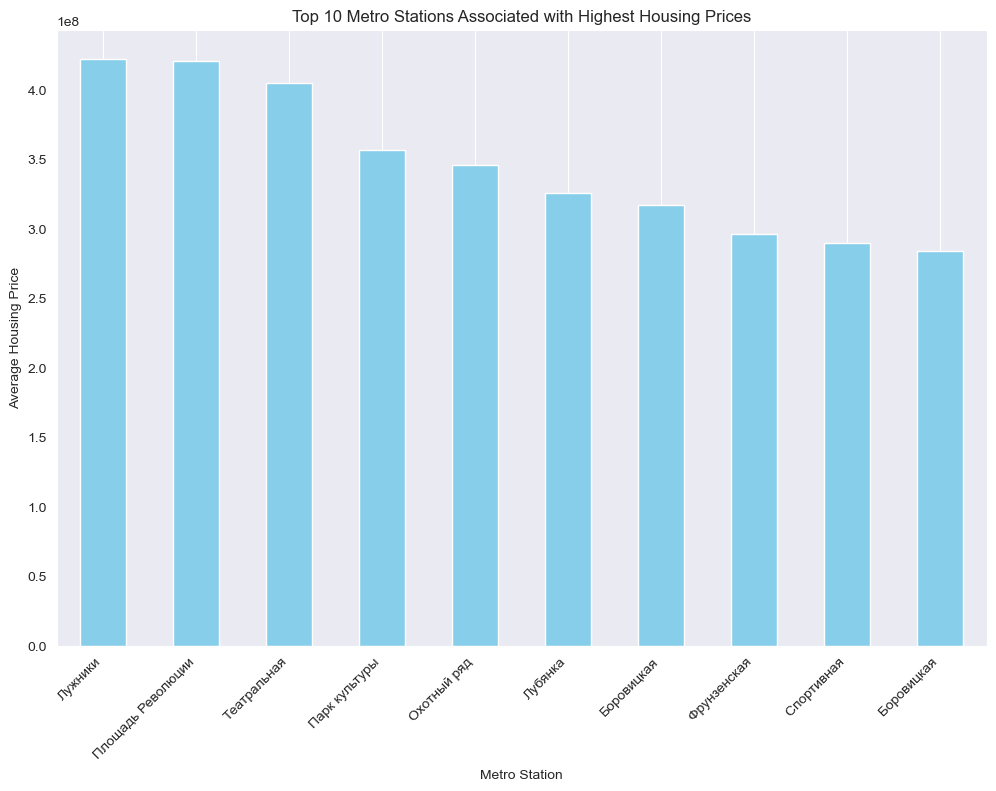

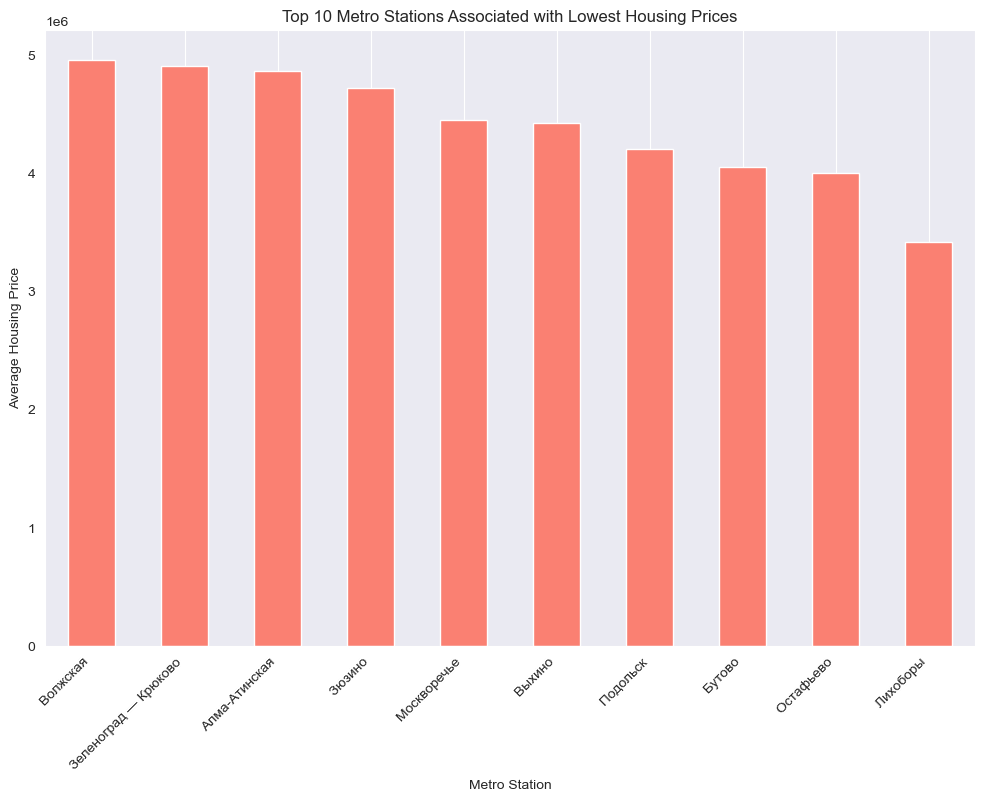

In [47]:
# Group data by metro station and calculate mean housing price
mean_price_by_station = df.groupby('Metro station')['Price'].mean().sort_values(ascending=False)

# Visualize results using a bar plot
plt.figure(figsize=(12, 8))
mean_price_by_station.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Metro Stations Associated with Highest Housing Prices')
plt.xlabel('Metro Station')
plt.ylabel('Average Housing Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 8))
mean_price_by_station.tail(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Metro Stations Associated with Lowest Housing Prices')
plt.xlabel('Metro Station')
plt.ylabel('Average Housing Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [50]:
# Calculate mean price for each metro station
mean_price_by_station = df.groupby('Metro station')['Price'].mean().reset_index()

# Top 10 with the highest average prices
top_10_high = mean_price_by_station.nlargest(10, 'Price')

# Top 10 with the lowest average prices
top_10_low = mean_price_by_station.nsmallest(10, 'Price')

In [51]:
print("\nTop 10 Metro Stations with Highest Average Housing Prices:")
for index, row in top_10_high.iterrows():
    print(f"{index+1}. {row['Metro station']}: {row['Price']:.2f} million")


Top 10 Metro Stations with Highest Average Housing Prices:
378. Лужники: 422029319.39 million
163.  Площадь Революции: 420430000.00 million
212.  Театральная: 405000000.00 million
431. Парк культуры: 356514978.86 million
426. Охотный ряд: 345594759.96 million
377. Лубянка: 325980125.00 million
291. Боровицкая: 317051056.17 million
239.  Фрунзенская: 296370512.82 million
202.  Спортивная: 289976686.41 million
25.  Боровицкая: 284000000.00 million


In [52]:
# Print station names and average prices
print("Top 10 Metro Stations with Lowest Average Housing Prices:")
for index, row in top_10_low.iterrows():
    print(f"{index+1}. {row['Metro station']}: {row['Price']:.2f} million")

Top 10 Metro Stations with Lowest Average Housing Prices:
100.  Лихоборы: 3420000.00 million
146.  Остафьево: 4000000.00 million
32.  Бутово: 4050000.00 million
164.  Подольск: 4200000.00 million
50.  Выхино: 4420000.00 million
118.  Москворечье: 4450000.00 million
65.  Зюзино: 4720000.00 million
268. Алма-Атинская: 4864040.75 million
63.  Зеленоград — Крюково: 4903900.00 million
44.  Волжская: 4960000.00 million


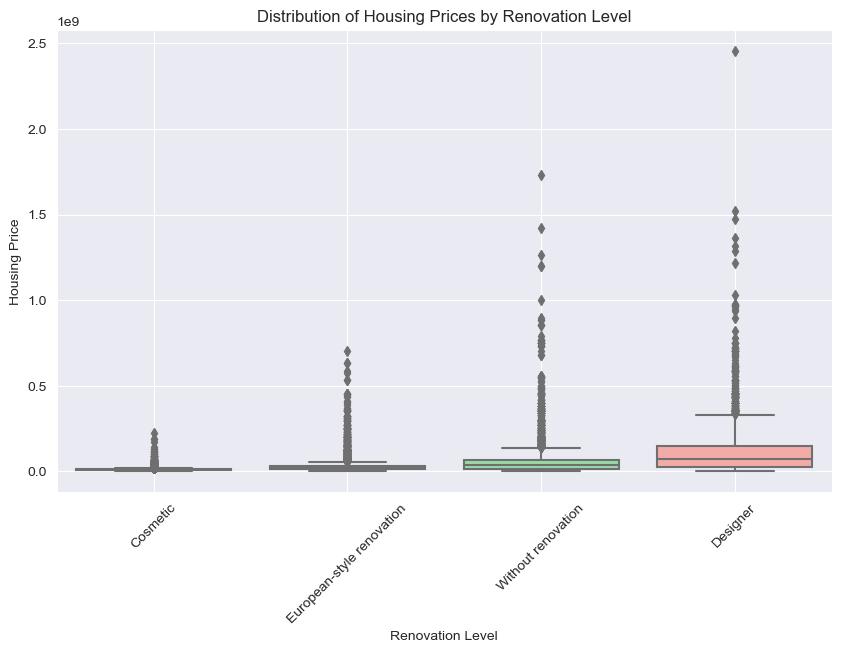

In [53]:
# Visualize distribution of housing prices for each renovation level using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Renovation', y='Price', palette='pastel')
plt.title('Distribution of Housing Prices by Renovation Level')
plt.xlabel('Renovation Level')
plt.ylabel('Housing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

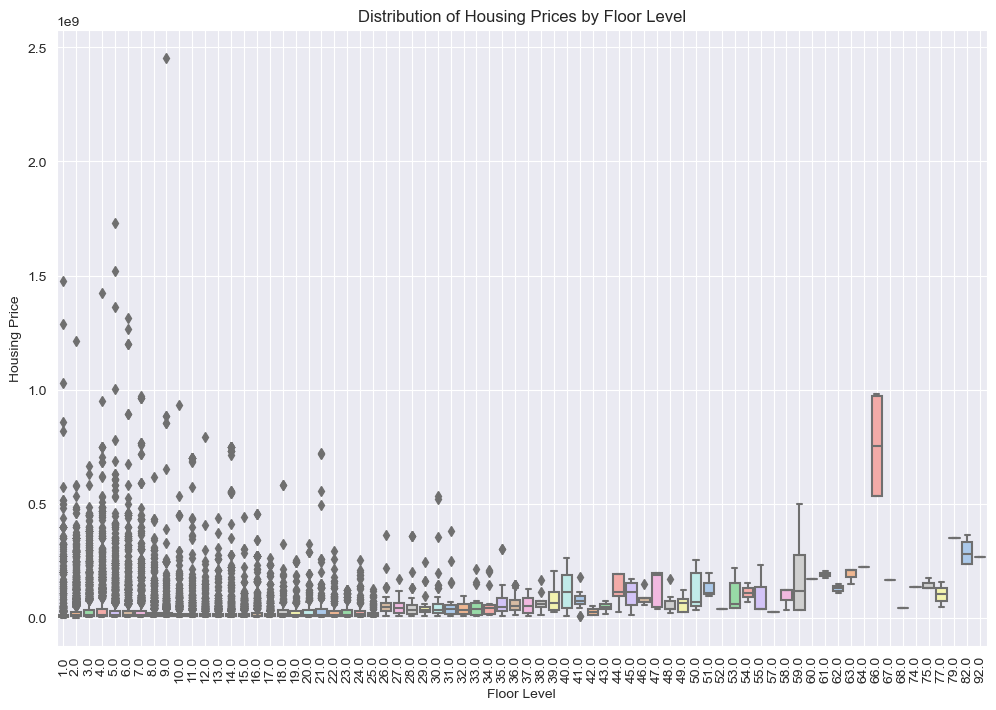

Kruskal-Wallis Test: statistic=2100.621106541525, p-value=0.0


In [55]:
# Visualize distribution of housing prices for each floor level using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Floor', y='Price', palette='pastel')
plt.title('Distribution of Housing Prices by Floor Level')
plt.xlabel('Floor Level')
plt.ylabel('Housing Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Perform Kruskal-Wallis test to determine if there are significant differences in housing prices among floor levels
statistic, p_value = kruskal(*[group['Price'] for name, group in df.groupby('Floor')])
print(f"Kruskal-Wallis Test: statistic={statistic}, p-value={p_value}")

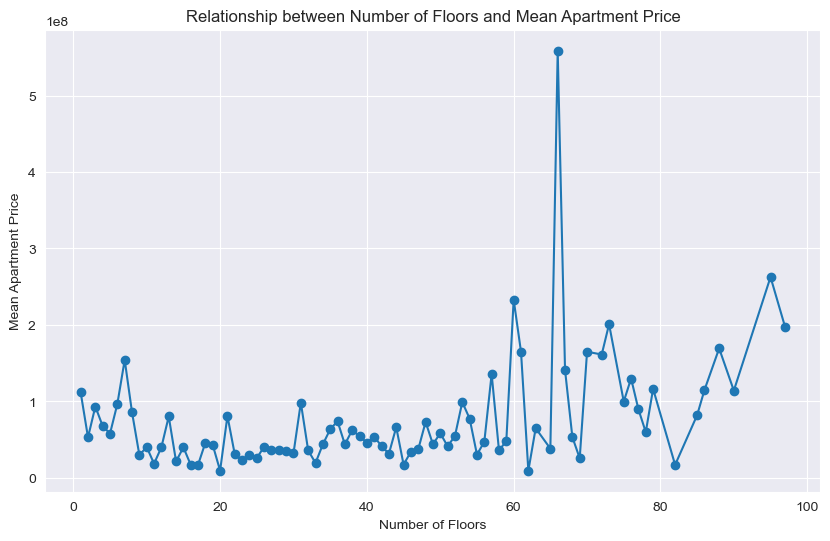

In [56]:
# Group data by number of floors and calculate mean price
mean_price_by_floors = df.groupby('Number of floors')['Price'].mean().reset_index()

# Visualize relationship using a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_floors['Number of floors'], mean_price_by_floors['Price'], marker='o', linestyle='-')
plt.title('Relationship between Number of Floors and Mean Apartment Price')
plt.xlabel('Number of Floors')
plt.ylabel('Mean Apartment Price')
plt.grid(True)
plt.show()

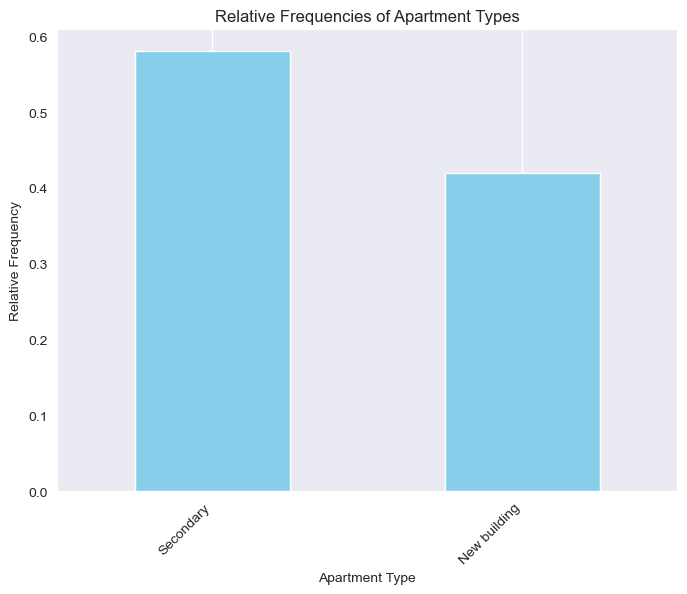

Most common apartment types:
Apartment type
Secondary       13152
New building     9524
Name: count, dtype: int64


In [65]:
# Count occurrences of each apartment type
apartment_type_counts = df['Apartment type'].value_counts()

# Calculate relative frequencies
relative_frequencies = apartment_type_counts / apartment_type_counts.sum()

# Visualize results using a bar plot
plt.figure(figsize=(8, 6))
relative_frequencies.plot(kind='bar', color='skyblue')
plt.title('Relative Frequencies of Apartment Types')
plt.xlabel('Apartment Type')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Display the most common apartment types
print("Most common apartment types:")
print(apartment_type_counts.head())

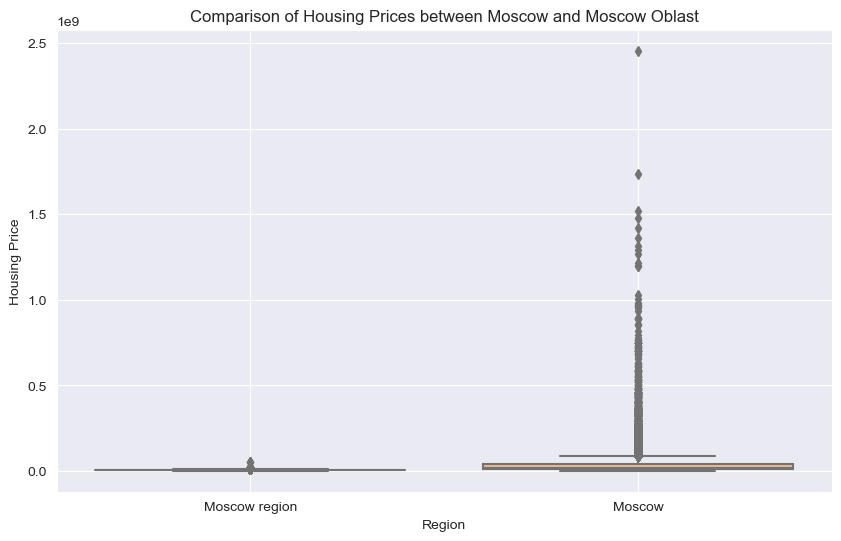

Independent Samples t-test: t-statistic=34.676100139894665, p-value=9.03493543036941e-257


In [70]:
# Separate data into subsets for Moscow and Moscow Oblast
moscow_prices = df[df['Region'] == 'Moscow']['Price']
moscow_oblast_prices = df[df['Region'] != 'Moscow']['Price']

# Compare price distributions using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Price', palette='pastel')
plt.title('Comparison of Housing Prices between Moscow and Moscow Oblast')
plt.xlabel('Region')
plt.ylabel('Housing Price')
plt.grid(True)
plt.show()

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(moscow_prices, moscow_oblast_prices)
print(f"Independent Samples t-test: t-statistic={t_statistic}, p-value={p_value}")